<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span><ul class="toc-item"><li><span><a href="#utility" data-toc-modified-id="utility-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>utility</a></span></li><li><span><a href="#hit_type" data-toc-modified-id="hit_type-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>hit_type</a></span></li></ul></li><li><span><a href="#layer-2-LGBM" data-toc-modified-id="layer-2-LGBM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>layer 2 LGBM</a></span></li></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
from taiko.profile import *
from taiko.database import *

import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import multiprocessing

Using TensorFlow backend.


In [3]:
record_df = load_record_df()
record_df

,drummer_name,song_id,left_sensor_datetime,right_sensor_datetime,capture_datetime
0,aaaaa,99,L_2018-09-28_111140.csv,R_2018-09-28_111142.csv,capture_2018_09_28_11_11_42
1,aaaaa,1,L_2018-09-28_111304.csv,R_2018-09-28_111305.csv,capture_2018_09_28_11_13_05
2,aaaaa,2,L_2018-09-28_111610.csv,R_2018-09-28_111611.csv,capture_2018_09_28_11_16_11
3,aaaaa,3,L_2018-09-28_111936.csv,R_2018-09-28_111937.csv,capture_2018_09_28_11_19_37
4,aaaaa,4,L_2018-09-28_112353.csv,R_2018-09-28_112355.csv,capture_2018_09_28_11_23_55
5,aaaaa,1,L_2018-09-28_112912.csv,R_2018-09-28_112913.csv,capture_2018_09_28_11_29_13
6,aaaaa,2,L_2018-09-28_113242.csv,R_2018-09-28_113244.csv,capture_2018_09_28_11_32_44
7,aaaaa,3,L_2018-09-28_113531.csv,R_2018-09-28_113532.csv,capture_2018_09_28_11_35_32
8,aaaaa,4,L_2018-09-28_113909.csv,R_2018-09-28_113910.csv,capture_2018_09_28_11_39_10
9,aaaaa,1,L_2018-09-28_114340.csv,R_2018-09-28_114340.csv,capture_2018_09_28_11_43_41


In [4]:
pd.DataFrame(data={
    'drummer_name': get_all_drummers()
})

,drummer_name
0,aaaaa
1,carolyn
2,celiven
3,chris
4,cuxi
5,eve
6,fatfat
7,howeverover
8,john
9,kdchang


In [5]:
create_all_drummer_profiles()

100%|██████████| 12/12 [00:05<00:00,  3.02it/s]


In [5]:
pfs = []
with multiprocessing.Pool() as p:
    drummers = get_all_drummers()
    for id_, pf in tqdm(enumerate(p.imap(get_profile, drummers)), total=len(drummers)):
        pf['who'] = id_
        pfs.append(pf)

pf = pd.concat(pfs, ignore_index=True)
# pf['hit_type'] = pf['hit_type'].transform(transform_hit_type)
pf

100%|██████████| 12/12 [01:50<00:00,  9.20s/it]


,L_A_AI,L_G_AI,L_AX_AI,L_AY_AI,L_AZ_AI,L_GX_AI,L_GY_AI,L_GZ_AI,L_A_MMI,L_G_MMI,...,R_GY_FR,R_GZ_FR,R_AXY_CORR,R_AYZ_CORR,R_AZX_CORR,R_GXY_CORR,R_GYZ_CORR,R_GZX_CORR,hit_type,who
0,1.117900,6.358400,0.229600,0.975500,0.459100,2.990000,0.028600,0.735900,1.113700,5.895600,...,92.6209,15.9058,-0.448000,0.811500,-0.661500,0.989800,0.642600,0.698900,1,0
1,1.193000,6.469600,0.126200,1.044300,0.510900,3.163500,3.087000,0.390000,1.173400,5.792100,...,95.5201,17.3706,-0.266200,0.744200,-0.556600,0.977300,0.713700,0.598300,1,0
2,1.194900,6.987000,0.071700,1.071400,0.462900,3.891000,3.109500,0.471000,1.192600,6.945200,...,62.9151,55.2246,-0.947400,0.903700,-0.922000,0.914100,0.698600,0.587600,1,0
3,1.189000,8.788500,0.075800,1.106900,0.347800,4.434800,-0.058600,-0.504000,1.197500,9.209000,...,56.9001,105.8044,-0.972300,0.608700,-0.656100,0.866100,0.825900,0.971200,1,0
4,1.173100,8.748600,0.080900,1.094600,0.325600,4.637500,-2.996600,-2.164500,1.182900,8.537800,...,81.6193,176.5076,-0.858800,-0.080400,0.170000,0.349500,-0.010100,0.929000,1,0
5,1.152400,8.901300,0.079700,1.036600,0.396300,4.885900,-5.731100,-3.307200,1.152900,8.463700,...,241.4246,163.2202,-0.910300,0.832200,-0.919500,0.785600,-0.697200,-0.105000,1,0
6,1.109700,8.731600,0.106600,0.920800,0.482100,5.004900,-4.736800,-3.073300,1.122300,8.188200,...,255.4596,293.2648,0.107400,0.811400,-0.329200,0.928300,-0.390700,-0.130300,1,0
7,1.058600,9.091900,0.078800,0.796700,0.578500,5.817900,0.271300,-2.603700,1.041700,8.188200,...,601.0376,339.2394,0.179700,0.564200,-0.391400,0.927100,-0.409900,-0.164200,1,0
8,1.187600,10.356800,-0.091200,0.946800,0.502900,7.893300,0.874100,-0.737600,1.184900,9.131300,...,601.0376,339.2394,-0.008800,0.514500,-0.385600,0.954600,-0.592000,-0.468800,1,0
9,1.275300,12.985700,-0.139600,1.079400,0.309800,9.272000,-1.730500,0.744100,1.382600,13.415400,...,601.0376,323.4801,0.160800,0.431500,-0.163700,0.916900,-0.480900,-0.301000,1,0


# LGBM training

## utility

In [6]:
def my_f1_score(y_pred, y):
    y = y.get_label()
    y_pred = y_pred.reshape(len(np.unique(y)), -1).argmax(axis=0)
    return "f1-score", metrics.f1_score(y, y_pred, average="macro"), True

In [7]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4, 5], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

## hit_type

In [9]:
train_df = pf.drop('who', axis=1).copy()

x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']

# train / valid / test = 0.4 / 0.4 / 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=0, test_size=0.5, stratify=y_train)

y_train

12774    2
12693    1
5316     0
13184    4
13294    5
1462     4
7660     5
5817     3
13205    5
5036     5
438      1
4018     6
9141     4
4956     5
928      7
11644    3
2191     3
12707    1
5280     6
5085     5
10899    6
13001    3
5673     1
4899     4
5263     6
4136     7
12577    7
2512     5
1119     1
5867     3
        ..
10180    2
13297    5
6348     1
6126     6
7939     6
3316     2
7775     6
3228     2
9477     6
3978     6
4560     2
8141     7
12493    7
12956    3
10484    4
10448    4
234      6
364      7
12575    7
5189     6
13603    0
10287    3
4386     1
3596     4
1009     1
194      5
3222     2
13429    6
3420     3
8518     2
Name: hit_type, Length: 5537, dtype: int64

In [10]:
train_set = lgb.Dataset(x_train, y_train)
valid_set = lgb.Dataset(x_valid, y_valid, free_raw_data=False)
watchlist = [valid_set]

params = dict({
    'learning_rate': 0.2,
    'application': 'multiclass',
    'num_classes': 8,
#     'min_data_in_leaf': 3,
    'max_depth': 5,
    'num_leaves': 2 ** 5,
    'verbosity': 0,
    'metric': 'None'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=500, verbose_eval=10, early_stopping_rounds=100, feval=my_f1_score)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[10]	valid_0's f1-score: 0.886389
[20]	valid_0's f1-score: 0.923901
[30]	valid_0's f1-score: 0.942195
[40]	valid_0's f1-score: 0.954612
[50]	valid_0's f1-score: 0.961535
[60]	valid_0's f1-score: 0.96415
[70]	valid_0's f1-score: 0.9669
[80]	valid_0's f1-score: 0.970146
[90]	valid_0's f1-score: 0.97232
[100]	valid_0's f1-score: 0.972852
[110]	valid_0's f1-score: 0.974029
[120]	valid_0's f1-score: 0.974991
[130]	valid_0's f1-score: 0.975196
[140]	valid_0's f1-score: 0.975826
[150]	valid_0's f1-score: 0.97645
[160]	valid_0's f1-score: 0.975615
[170]	valid_0's f1-score: 0.976103
[180]	valid_0's f1-score: 0.97703
[190]	valid_0's f1-score: 0.977361
[200]	valid_0's f1-score: 0.977733
[210]	valid_0's f1-score: 0.978276
[220]	valid_0's f1-score: 0.978455
[230]	valid_0's f1-score: 0.978495
[240]	valid_0's f1-score: 0.978677
[250]	valid_0's f1-score: 0.979181
[260]	valid_0's f1-score: 0.979012
[270]	valid_0's f1-score: 0.978618
[280]	v

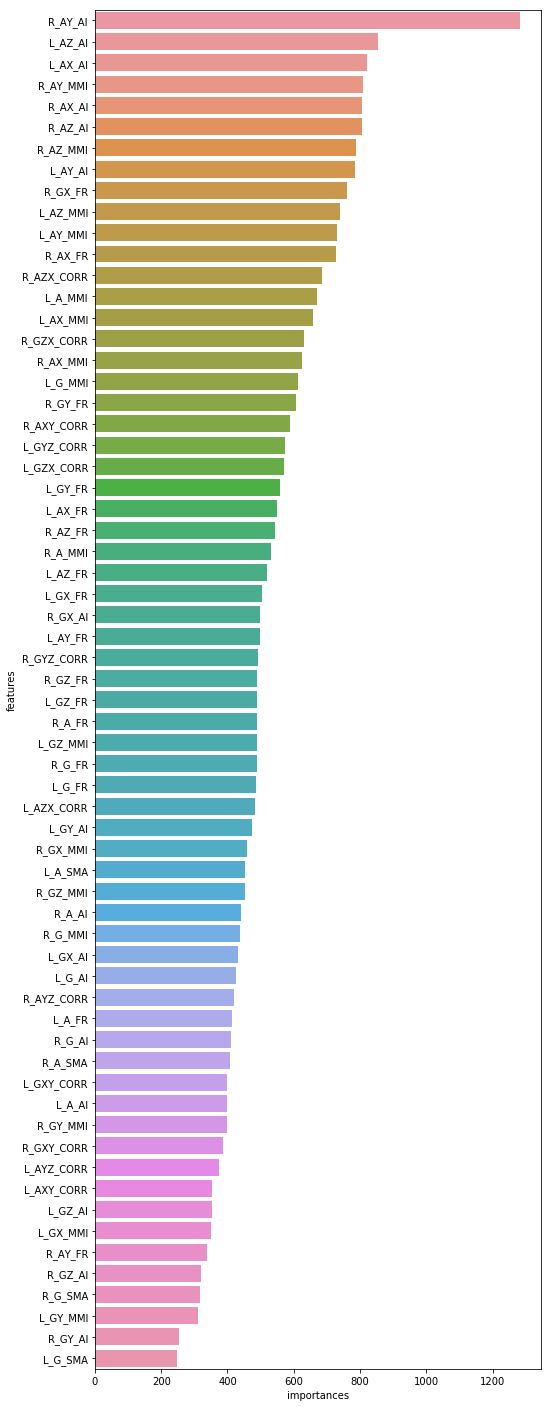

In [11]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 25))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [12]:
y_preds = []
for y_pred_ in [y_pred]:
    predictions = []
    for x in y_pred_:
        predictions.append(np.argmax(x))
    y_preds.append(pd.Series(data=predictions))

Normalized confusion matrix
[[0.99103139 0.0044843  0.         0.         0.         0.0044843
  0.         0.        ]
 [0.00542005 0.96205962 0.00271003 0.01897019 0.00271003 0.00542005
  0.00271003 0.        ]
 [0.00271739 0.00271739 0.98369565 0.00271739 0.00271739 0.00271739
  0.00271739 0.        ]
 [0.         0.01886792 0.         0.97574124 0.         0.00269542
  0.00269542 0.        ]
 [0.00542005 0.         0.00813008 0.         0.97831978 0.00271003
  0.00542005 0.        ]
 [0.         0.         0.         0.         0.         0.98128342
  0.01069519 0.00802139]
 [0.         0.         0.         0.         0.         0.01336898
  0.98663102 0.        ]
 [0.00623053 0.         0.00311526 0.         0.         0.02180685
  0.00311526 0.96573209]]


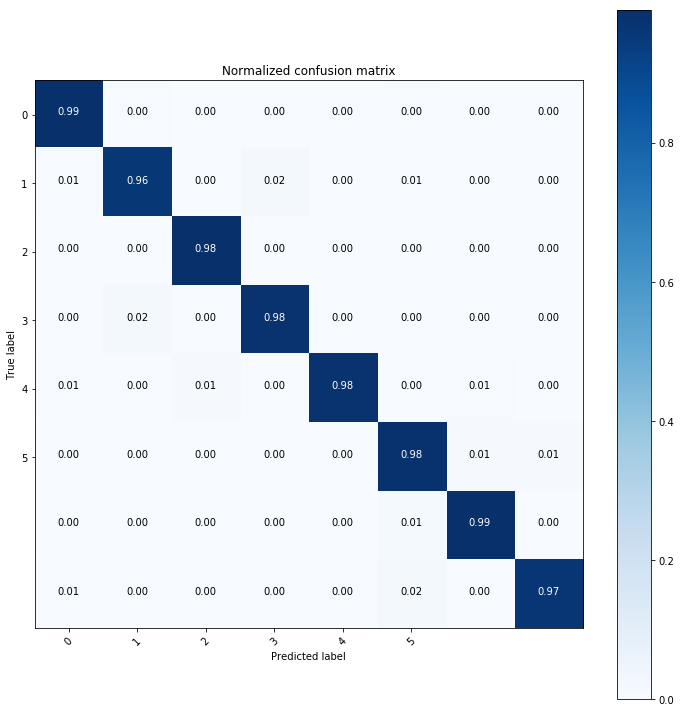

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       223
           1       0.98      0.96      0.97       369
           2       0.99      0.98      0.99       368
           3       0.98      0.98      0.98       371
           4       0.99      0.98      0.99       369
           5       0.95      0.98      0.97       374
           6       0.97      0.99      0.98       374
           7       0.99      0.97      0.98       321

   micro avg       0.98      0.98      0.98      2769
   macro avg       0.98      0.98      0.98      2769
weighted avg       0.98      0.98      0.98      2769

0.9777696092366701


In [13]:
y_tests = [y_test]
for y_pre, y_tst in zip(y_preds, y_tests):
    cutstom_output_cnf_matrix(y_tst, y_pre)
    print(metrics.classification_report(y_tst, y_pre))
    
    print(metrics.f1_score(y_tst, y_pre, average = 'macro'))

In [14]:
model.save_model('lgbm_model.h5')

# layer 2 LGBM

In [15]:
plot_df = pd.DataFrame({'features': model.feature_name(),
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)
plot_df = plot_df.head(12)
list(plot_df['features'])

['R_AY_AI',
 'L_AZ_AI',
 'L_AX_AI',
 'R_AY_MMI',
 'R_AX_AI',
 'R_AZ_AI',
 'R_AZ_MMI',
 'L_AY_AI',
 'R_GX_FR',
 'L_AZ_MMI',
 'L_AY_MMI',
 'R_AX_FR']

In [16]:
train_df = pf.drop('who', axis=1).copy()

x = train_df[list(plot_df['features'])]
y = train_df['hit_type']

# train / valid / test = 0.4 / 0.4 / 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=0, test_size=0.5, stratify=y_train)

y_train

12774    2
12693    1
5316     0
13184    4
13294    5
1462     4
7660     5
5817     3
13205    5
5036     5
438      1
4018     6
9141     4
4956     5
928      7
11644    3
2191     3
12707    1
5280     6
5085     5
10899    6
13001    3
5673     1
4899     4
5263     6
4136     7
12577    7
2512     5
1119     1
5867     3
        ..
10180    2
13297    5
6348     1
6126     6
7939     6
3316     2
7775     6
3228     2
9477     6
3978     6
4560     2
8141     7
12493    7
12956    3
10484    4
10448    4
234      6
364      7
12575    7
5189     6
13603    0
10287    3
4386     1
3596     4
1009     1
194      5
3222     2
13429    6
3420     3
8518     2
Name: hit_type, Length: 5537, dtype: int64

In [17]:
train_set = lgb.Dataset(x_train, y_train)
valid_set = lgb.Dataset(x_valid, y_valid, free_raw_data=False)
watchlist = [valid_set]

params = dict({
    'learning_rate': 0.2,
    'application': 'multiclass',
    'num_classes': 8,
#     'min_data_in_leaf': 3,
    'max_depth': 5,
    'num_leaves': 2 ** 5,
    'verbosity': 0,
    'metric': 'None'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=500, verbose_eval=10, early_stopping_rounds=100, feval=my_f1_score)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[10]	valid_0's f1-score: 0.819926
[20]	valid_0's f1-score: 0.856164
[30]	valid_0's f1-score: 0.878138
[40]	valid_0's f1-score: 0.892611
[50]	valid_0's f1-score: 0.902325
[60]	valid_0's f1-score: 0.910001
[70]	valid_0's f1-score: 0.915255
[80]	valid_0's f1-score: 0.92113
[90]	valid_0's f1-score: 0.926463
[100]	valid_0's f1-score: 0.929534
[110]	valid_0's f1-score: 0.930918
[120]	valid_0's f1-score: 0.931614
[130]	valid_0's f1-score: 0.931238
[140]	valid_0's f1-score: 0.932164
[150]	valid_0's f1-score: 0.934108
[160]	valid_0's f1-score: 0.934367
[170]	valid_0's f1-score: 0.934144
[180]	valid_0's f1-score: 0.935669
[190]	valid_0's f1-score: 0.935764
[200]	valid_0's f1-score: 0.936201
[210]	valid_0's f1-score: 0.937519
[220]	valid_0's f1-score: 0.937789
[230]	valid_0's f1-score: 0.938415
[240]	valid_0's f1-score: 0.93835
[250]	valid_0's f1-score: 0.939255
[260]	valid_0's f1-score: 0.939425
[270]	valid_0's f1-score: 0.940508
[28

In [18]:
y_preds = []
for y_pred_ in [y_pred]:
    predictions = []
    for x in y_pred_:
        predictions.append(np.argmax(x))
    y_preds.append(pd.Series(data=predictions))

Normalized confusion matrix
[[0.95964126 0.00896861 0.01793722 0.         0.0044843  0.00896861
  0.         0.        ]
 [0.00271003 0.9403794  0.00271003 0.03794038 0.         0.01084011
  0.00271003 0.00271003]
 [0.         0.         0.96195652 0.00271739 0.0298913  0.00543478
  0.         0.        ]
 [0.         0.02695418 0.         0.94878706 0.00269542 0.00539084
  0.01347709 0.00269542]
 [0.01355014 0.         0.03523035 0.00813008 0.92682927 0.01084011
  0.00542005 0.        ]
 [0.         0.00802139 0.         0.01336898 0.         0.93850267
  0.01871658 0.02139037]
 [0.         0.00534759 0.         0.01336898 0.         0.04278075
  0.92780749 0.01069519]
 [0.00623053 0.02180685 0.         0.00623053 0.00311526 0.02803738
  0.01557632 0.91900312]]


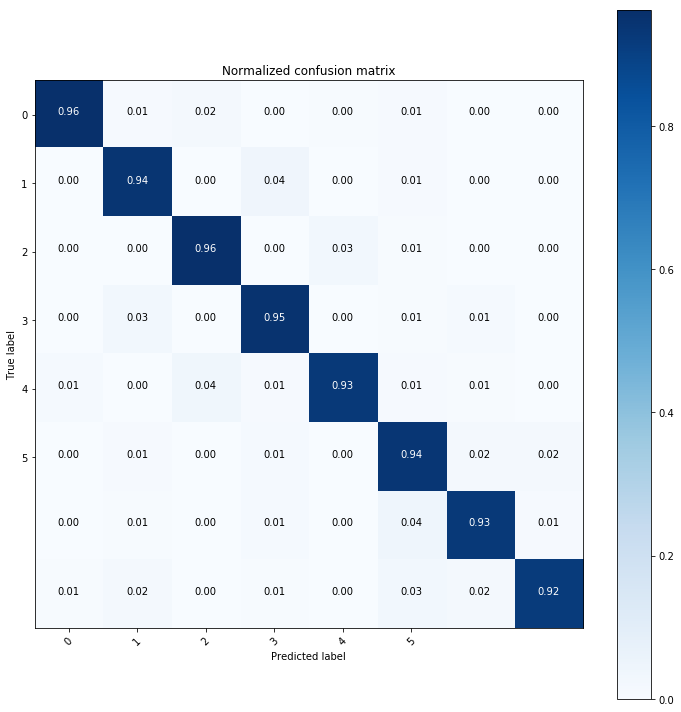

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       223
           1       0.94      0.94      0.94       369
           2       0.95      0.96      0.96       368
           3       0.92      0.95      0.93       371
           4       0.96      0.93      0.94       369
           5       0.90      0.94      0.92       374
           6       0.95      0.93      0.94       374
           7       0.95      0.92      0.94       321

   micro avg       0.94      0.94      0.94      2769
   macro avg       0.94      0.94      0.94      2769
weighted avg       0.94      0.94      0.94      2769

0.9408369857342864


In [19]:
y_tests = [y_test]
for y_pre, y_tst in zip(y_preds, y_tests):
    cutstom_output_cnf_matrix(y_tst, y_pre)
    print(metrics.classification_report(y_tst, y_pre))
    
    print(metrics.f1_score(y_tst, y_pre, average = 'macro'))